<img src="https://thumbs.gfycat.com/GleefulFemaleCrossbill.webp" width="350" height="350" align="left">

<h1><b>🍕 Trend Pizza Revenue</b></h1>

Manager di sebuah restoran yang menyajikan pizza ingin mengevaluasi performansi penjualan pizza pada tahun 2015. Manager ingin mendapatkan gambaran yang komprehensif tentang kinerja penjualan pizza selama periode tersebut. Dengan menganalisis data penjualan dengan seksama, dapat diidentifikasi faktor-faktor yang mempengaruhi hasil penjualan dan melacak tren pendapatan yang terjadi selama tahun tersebut.

Manager menargetkan total <i>revenue</i> yang harus didapatkan tiap bulan sebesar \$69,000. Sehingga perlu dibuat sebuah visualisasi data untuk menggambarkan <i>revenue</i> yang diperoleh tiap bulan untuk penjualan pizza dan melihat pada bulan apa saja target yang ditetapkan tercapai

<br><br><br>
<img alt="Linked In Link" src="https://img.shields.io/badge/-Bachtiyar%20M.%20Arief-ECDD5C?style=for-the-badge&logo=None&logoColor=white" align="right"/>






# 📺 Generate Solution
---

Untuk memenuhi kebutuhan manager tersebut yang ingin mengetahui <i>performance revenue</i> penjualan pizza di restoran tiap bulannya maka salah satu grafik yang bisa menggambarkan total revenue dari waktu ke waktu adalah dengan menggunakan grafik garis (<i>line chart</i>)

Grafik garis dipilih karena memungkinkan melihat tren atau pola perubahan data seiring waktu. Garis yang terhubung antara titik-titik data membantu menggambarkan apakah ada peningkatan, penurunan, atau fluktuasi dalam data sepanjang periode waktu yang ditampilkan.


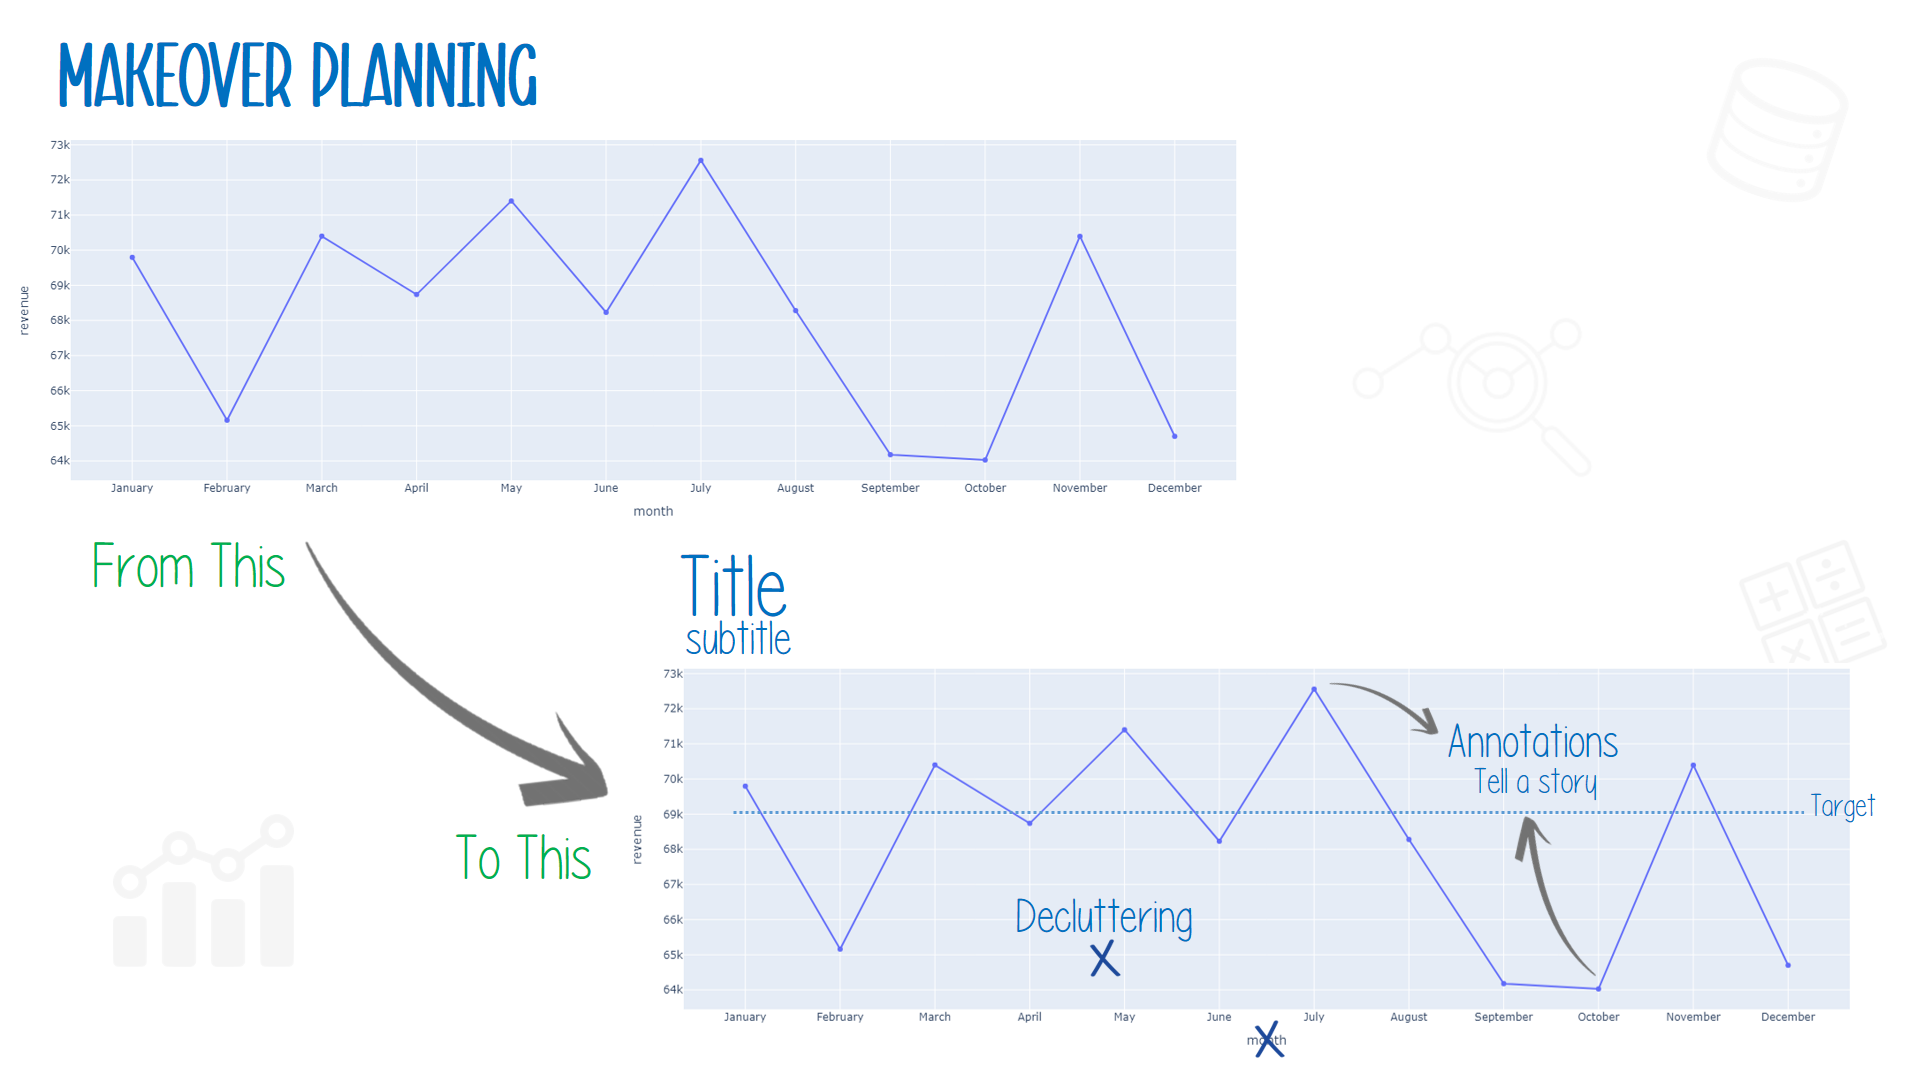

# 📊 Proses Ekstraksi Data


---


Data yang akan diolah berekstensi .csv (<i>Comma Separated Value</i>) yang bersumber dari <a href='https://raw.githubusercontent.com/bachtiyararief/datasets/main/pizza_sales/pizza_all_joined.csv'>API</a> berikut. Data tersebut memuat <i>record</i> satu tahun penjualan dari sebuah tempat pizza fiktif, termasuk tanggal dan waktu setiap pesanan serta pizza yang disajikan, dengan detail tambahan mengenai jenis, ukuran, jumlah, harga, dan bahan-bahan.

Untuk mengekstraksi data tersebut perlu mengimpor salah satu library yang powerful pada python yakni <a href="https://pandas.pydata.org/">pandas</a>. Gunakan method <code>pandas.read_csv(filepath_or_buffer = ...)</code> untuk mengekstrak data berekstensi csv dan mengubah formatnya menjadi DataFrame pandas.

docs : <i>https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html</i>

In [1]:
# Proses ignore warning yang muncul pada output
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import library yang dibutuhkan
import pandas as pd

# Proses ekstrasi data
data_pizza = pd.read_csv('https://raw.githubusercontent.com/bachtiyararief/datasets/main/pizza_sales/pizza_all_joined.csv')

# Tampilkan data
display(data_pizza.head())

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


# 🔍 Informasi Umum pada Data
---

Informasi umum seperti banyak record dan kolom data, tipe data dan jumlah missing value pada data dapat diperoleh dengan mengeksekusi sintaks <code>DataFrame.info()</code>

docs : <i>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html</i>

In [3]:
# Cek informasi umum pada data
data_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


# 🔢 Transformasi Data
---

Tidak semua informasi pada data diperlukan untuk mengetahui tren penjualan pizza tiap bulan. Setelah diinspeksi ternyata hanya dibutuhkan kolom `order_id` sebagai id transaksi, `date` yang merupakan tanggal transaksi dilakukan, `price` merupakan harga pizza dan kolom `quantity` untuk menyatakan kuantitas atau banyak pizza yang dipesan. Dengan beberapa kolom tersebut akan dilakukan transformasi data sebagai berikut :

<ol>
  <li>Pastikan kolom `date` bertipe data tanggal (*date* atau *datetime*)</li>
  <li>Tambahkan satu kolom yakni `month` yang merupakan nama bulan dilakukannya transaksi</li>
  <li>Pastikan kolom bulan bertipe data kategorikal agar dapat diurutkan berdasarkan urutan bulan</li>
  <li>Tambahkan kolom lain yakni `year` yang merupakan tahun dilakukannya transaksi</li>
  <li>Tambahkan kolom lain `total_price` yang merupakan hasil perkalian antara harga dan kuantitas</li>
</ol>

Jika semua perhitungan telah dilakukan tampilkan kembali data yang akan diolah

In [4]:
# Ambil kolom yang diperlukan saja yakni order_id, date, price dan quantity
sales_data = data_pizza[['order_id', 'date', 'price', 'quantity']]

In [5]:
# Transformasikan kolom date yang berawal dari str menjadi datetime
sales_data = sales_data.astype({
    'date' : 'datetime64[ns]'
})

In [6]:
# Ekstrak nama bulan
monthname = sales_data['date'].dt.month_name()

# Tambahkan kolom month yang menyatakan bulan dilakukan transaksi
sales_data.insert(
    loc = 2,
    column = 'month',
    value = monthname
)

# Transformasikan kolom month menjadi tipe kategorikal
months = ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"]

sales_data['month'] = pd.Categorical(
    sales_data['month'],
    categories = months,
    ordered = True
)

In [7]:
# Tambahkan kolom year yang menyatakan tahun dilakukan transaksi
sales_data.insert(
    loc = 3,
    column = 'year',
    value = sales_data['date'].dt.year
)

In [8]:
# Tambahkan kolom total_price yakni hasil kali kuantitas dan harga
sales_data['total_price'] = sales_data['quantity'] * sales_data['price']

In [9]:
# Tampilkan hasilnya
display(sales_data)

,order_id,date,month,year,price,quantity,total_price
0,1,2015-01-01,January,2015,13.25,1,13.25
1,2,2015-01-01,January,2015,16.00,1,16.00
2,2,2015-01-01,January,2015,18.50,1,18.50
3,2,2015-01-01,January,2015,20.75,1,20.75
4,2,2015-01-01,January,2015,16.00,1,16.00
...,...,...,...,...,...,...,...
48615,21348,2015-12-31,December,2015,16.75,1,16.75
48616,21348,2015-12-31,December,2015,17.95,1,17.95
48617,21348,2015-12-31,December,2015,12.00,1,12.00
48618,21349,2015-12-31,December,2015,20.25,1,20.25


# 🧮 Agregasi Data
---
Lakukan proses agregasi untuk menghitung <i>revenue</i> tiap bulan yang diperoleh dengan menghitung total harga lalu dikelompokkan berdasarkan bulan dan tahun. Untuk dapat melakukan hal ini gunakan sintaks `DataFrame.groupby(by = ...)` untuk mengelompokkan data berdasarkan kolom yang ditentukan lalu lanjutkan dengan method `.agg(kolom_baru = (measure, jenis_perhitungan))`


docs : <i>https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html</i>

In [10]:
# Proses agregasi perhitungan summation total_price yang dikelompokkan berdasarkan kolom month dan year
sales_overtime = sales_data.groupby(by = ['month', 'year'], as_index = False)\
                           .agg(revenue = ('total_price', pd.Series.sum))

# Tampilkan hasil agregasi
display(sales_overtime.head())

,month,year,revenue
0,January,2015,69793.30
1,February,2015,65159.60
2,March,2015,70397.10
3,April,2015,68736.80
4,May,2015,71402.75


Setelah melakukan agregasi data maka data yang akan divisualisasikan telah diperoleh. Langkah selanjutnya adalah proses visualisasi data

# 📈 Basic Visualization

---

Untuk membuat grafik line chart yang dinamis pada python dapat menggunakan library `plotly`. Plotly dipilih karena sifatnya yang interaktif, kaya akan fitur dan mudah digunakan. Line chart pada plotly dapat dibuat dengan menentukan data dan aturan sumbu (x dan y) kemudian diinputkan ke method `px.line()` sebagai grafik garis

```
DataFrame yang digunakan = sales_overtime
Nama kolom sebagai sumbu x = month
Nama kolom sebagai sumbu y = revenue
```

docs : <i>https://plotly.com/python-api-reference/generated/plotly.express.line</i>

Proses install library plotly

In [11]:
pip install plotly==5.15.0

In [12]:
pip install -U kaleido

Note : *Jika anda mencoba di jupyter notebook atau google colab anda bisa
skip (kode dibawah ini tidak dieksekusi)*

In [13]:
# Case kali ini akan di render kedalam file svg
import plotly.io as pio
pio.renderers.default = "png"

Proses pembuatan grafik dasar

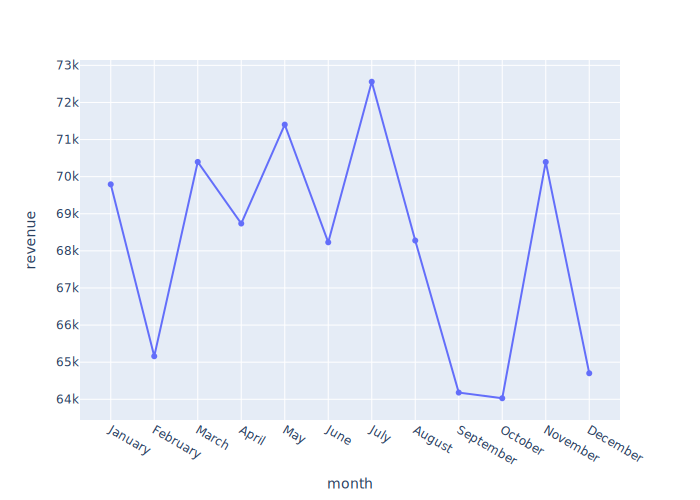

In [14]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True
)

# Tampilkan grafik
fig.show()

Grafik diatas sebenarnya sudah cukup untuk menggambarkan *trend* data total *revenue* yang diperoleh restoran dari tiap bulan pada tahun 2015. Namun jika ditambahkan beberapa ornamen seperti penambahan judul, pemberian anotasi, mengatur ukuran chart dan lainnya perlu dilakukan agar data dapat bercerita sendiri sehingga detail informasi atau <i>insight</i> tambahan dapat tersampaikan pada <i>audience</i> atau pengguna data

# 👨‍🔧 Reparasi Visualisasi Data

---

Agar grafik tidak hanya menampilkan data melainkan menyampaikan atensi tertentu atau menyampaikan informasi yang lebih detail maka grafik dasar perlu dilakukan 'reparasi'. Reparasi atau perbaikan diantaranya adalah :     

1.   Menonjolkan *Preattentive Attribute*
2.   Mengurangi *Cognitive Load* dengan *Decluttering*
3.   Menambahkan *Annotation* atau label pada data tertentu
dll

docs : <i>https://help.tableau.com/current/blueprint/en-us/bp_why_visual_analytics.htm</i>

## 👨‍🔧 Reparasi Data Viz - 1 : Menonjolkan Atensi
---
Atensi yang ingin ditonjolkan adalah sebagai berikut :

<ul>
  <li>Memberi label total <i>revenue</i> pada awal bulan dan akhir bulan, hal ini bertujuan untuk membantu pengamat dengan cepat mengidentifikasi bagaimana performansi penjualan pizza di awal dan di akhir tahun apakah signifikan terus bertumbuh atau justru sebaliknya</li>
  <li>Memberi <i>annotation</i> pada dua kondisi yakni saat penjualan mencapai puncak tertinggi dan saat penjualan berada di titik terendah dengan tujuan agar pengamat dapat mengevaluasi pada bulan apa revenue berada di titik tertinggi dan mengevaluasi mengapa hal tersebut dapat terjadi begitu pula dengan sebaliknya</li>
</ul>

Langkah awal yang perlu dilakukan adalah mendapatkan index data yang ingin diberi atensi dengan mengeksekusi sintaks berikut

In [15]:
# Proses pencarian index data revenue diawal, akhir, terbaik dan terburuk pada data agregasi
index_awal = 0
index_akhir = sales_overtime.shape[0] - 1
index_max = sales_overtime['revenue'].idxmax()
index_min = sales_overtime['revenue'].idxmin()

# Buat index untuk attention
index_attention = [index_awal, index_akhir, index_max, index_min]

# Ambil data sales overtime pada index yang telah ditentukan
attention = sales_overtime[sales_overtime.index.isin(index_attention)]

# Tampilkan data atensi
display(attention)

,month,year,revenue
0,January,2015,69793.30
6,July,2015,72557.90
9,October,2015,64027.60
11,December,2015,64701.15


### 👨‍🔧 Reparasi Data Viz - 1A : *Pemberian Titik*
---
Pada perhitungan diatas dapat diketahui bahwa awal bulan transaksi adalah January 2015 dan akhir bulan transaksi adalah December 2015. Untuk memberikan atensi pada awal dan akhir bulan ini akan diberi *annotation* berupa label bulan dan total *revenue*. Sedangkan transaksi tertinggi terjadi pada bulan July 2015 dan terendahnya terjadi pada bulan October 2015. Pada kedua data akan diberikan label bulan dan total *revenue* kemudian ditambahkan annotasi berupa teks yang menceritakan hal yang mungkin terjadi pada bulan tersebut.

Kemudian penanda titik pada awal dan akhir bulan juga akan sedikit dibesarkan dari pada penanda titik pada bulan lain, sedangkan penanda titik pada puncak tertinggi *revenue* dan titik terendah akan diberikan titik paling besar agar fokus perhatian tertuju pada kedua data tersebut.

Untuk dapat melakukan hal ini gunakan `add_trace` untuk menambahkan grafik lain pada figure yang telah dibuat lalu gunakan grafik `scatter` (grafik titik) sebagai penanda titik pada fokus yang telah ditentukan.

docs : <i>https://plotly.com/python-api-reference/generated/plotly.express.scatter</i>

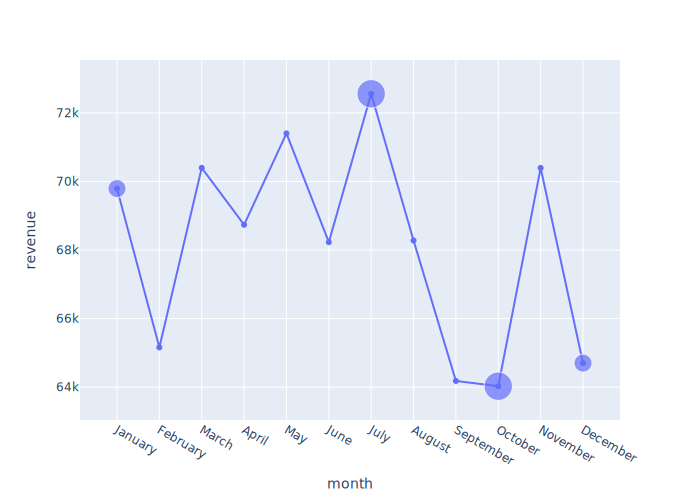

In [16]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention,
        x = 'month',
        y = 'revenue',
        size = [4, 10, 10, 4]
    ).data[0]
)

# Tampilkan grafik
fig.show()

pada grafik dapat dilihat bahwa untuk awal dan akhir tahun penanda titik sedikit lebih besar dari pendanda bulan lain sedangkan pada puncak tertinggi revenue yang diperoleh dan titik terendahnya diberi pendanda titik yang paling besar agar fokus utama langsung tertuju pada kedua data tersebut.

### 👨‍🔧 Reparasi Data Viz - 1B : Memberi Label Data
---
Label digunakan untuk menjelaskan data lebih lengkap karena bentuk visualisasi biasanya tidak begitu akurat dilihat oleh mata. Sehingga pada atensi tertentu (dalam hal ini awal-akhir bulan dan max-min revenue) perlu diberi label atau anotasi.

Untuk membubuhi label pada data gunakan `add_annotation` dengan parameter berikut

```
  x = posisi koordinat x (absis) anotasi yang ingin ditampilkan
  y = posisi koordinat y (ordinat) anotasi yang ingin ditampilkan
  text = teks anotasi
```
   
docs : <i>https://plotly.com/python/reference/layout/annotations/</i>

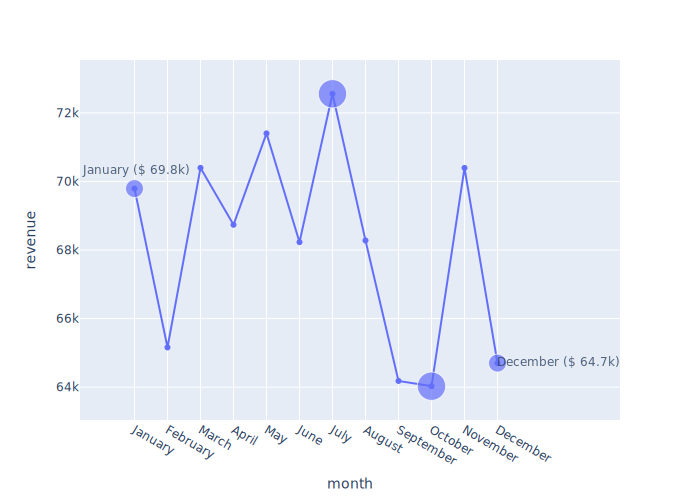

In [17]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention,
        x = 'month',
        y = 'revenue',
        size = [4, 10, 10, 4]
    ).data[0]
)

"""
  Preattentive Attribute 1B
    - Tambahkan label data pada awal & akhir tahun
    - Label berupa nama bulan dan total revenue yang diperoleh
    - Pembulatan revenue ke angka ribuan terdekat
"""

# Label untuk awal tahun (index_awal)
fig.add_annotation(
    x = attention.loc[index_awal, 'month'],
    y = attention.loc[index_awal, 'revenue'],
    text = f"{attention.loc[index_awal, 'month']} ($ {attention.loc[index_awal, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 10,
    opacity = 0.8
)

# Label untuk akhir tahun (index_akhir)
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = attention.loc[index_akhir, 'revenue'],
    text = f"{attention.loc[index_akhir, 'month']} ($ {attention.loc[index_akhir, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    xshift = 60,
    yshift = -8,
    opacity = 0.8
)

# Tampilkan grafik
fig.show()

### 👨‍🔧 Reparasi Data Viz - 1C : *Annotations*
---
*Annotations* adalah catatan yang ditambahkan dengan cara memberi komentar atau penjelasan pada data yang ditunjuk (biasanya ingin memberikan pesan atau alasan tertentu)

Pada data dengan revenue tertinggi akan diberi annotasi sebagai berikut :

```
 Best Performance pada (nama bulan dengan revenue tertinggi) ($ (max revenue))
 Musim panas dan bertepatan dengan libur sekolah membuat pizza menjadi kudapan yang banyak dicari untuk dinikmati bersama teman atau keluarga
```

Pada data dengan pendapatan tertinggi fokuskan pada apa yang mungkin terjadi pada bulan tersebut sehingga penjualan dapat meningkat tajam. Kedepannya mungkin strategi yang sama atau ditingkatkan dapat diterapkan pada waktu berikutnya.


Pada data dengan revenue terendah akan diberi annotasi sebagai berikut :

```
Need Improvement pada (nama bulan dengan revenue terendah) ($ (min revenue))
Perusahaan mengalami dampak besar pada bulan ini, sehingga perusahaan mencoba menerapkan Major Change Strategy
```

Pada data dengan pendapatan terendah fokuskan pada apa yang perusahaan perlu lakukan untuk mengatasi hal ini.


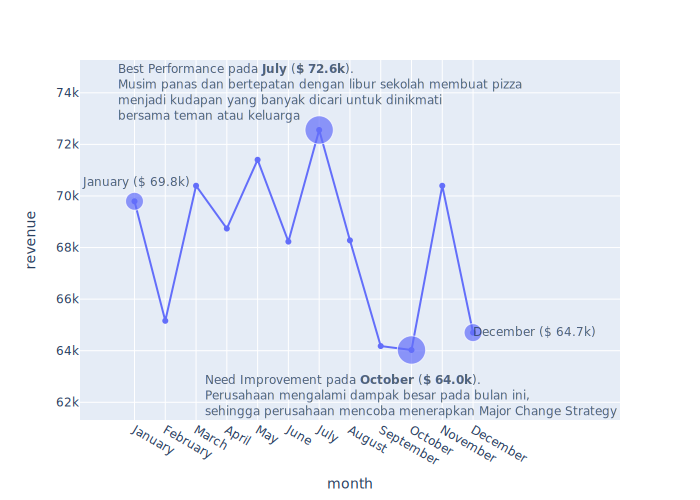

In [18]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention,
        x = 'month',
        y = 'revenue',
        size = [4, 10, 10, 4]
    ).data[0]
)

"""
  Preattentive Attribute 1B
    - Tambahkan label data pada awal & akhir tahun
    - Label berupa nama bulan dan total revenue yang diperoleh
    - Pembulatan revenue ke angka ribuan terdekat
"""

# Label untuk awal tahun (index_awal)
fig.add_annotation(
    x = attention.loc[index_awal, 'month'],
    y = attention.loc[index_awal, 'revenue'],
    text = f"{attention.loc[index_awal, 'month']} ($ {attention.loc[index_awal, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 10,
    opacity = 0.8
)

# Label untuk akhir tahun (index_akhir)
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = attention.loc[index_akhir, 'revenue'],
    text = f"{attention.loc[index_akhir, 'month']} ($ {attention.loc[index_akhir, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    xshift = 60,
    yshift = -8,
    opacity = 0.8
)

"""
  Preattentive Attribute 1C
    - Tambahkan annotation pada revenue tertinggi dan terendah
    - Buat analisa sederhana mengapa hal tersebut dapat terjadi
"""

# Annotation untuk revenue tertinggi (index_max)
fig.add_annotation(
    x = attention.loc[index_max, 'month'],
    y = attention.loc[index_max, 'revenue'],
    text = f"Best Performance pada <b>{attention.loc[index_max, 'month']}</b> (<b>$ { attention.loc[index_max, 'revenue']/1000:.1f}k</b>).<br>"
            "Musim panas dan bertepatan dengan libur sekolah membuat pizza<br>"
            "menjadi kudapan yang banyak dicari untuk dinikmati<br>"
            "bersama teman atau keluarga",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 5,
    opacity = 0.8
)

# Annotation untuk revenue terendah (index_min)
fig.add_annotation(
    x = attention.loc[index_min, 'month'],
    y = attention.loc[index_min, 'revenue'],
    text = f"Need Improvement pada <b>{attention.loc[index_min, 'month']}</b> (<b>$ {attention.loc[index_min, 'revenue']/1000:.1f}k</b>).<br>"
            "Perusahaan mengalami dampak besar pada bulan ini,<br>"
            "sehingga perusahaan mencoba menerapkan <i>Major Change Strategy</i><br>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = -70,
    opacity = 0.8
)

# Tampilkan grafik
fig.show()

## 👨‍🔧 Reparasi Data Viz - 2 : Penambahan Garis Target Tahunan
---
Manager telah menargetkan total *revenue* yang harus didapatkan tiap bulan sebesar $69,000. Sehingga perlu untuk ditambahkan garis tambahan yang menggambarkan target yang ditetapkan. Harapannya agar data dapat diklasifikasikan dengan mudah, pada bulan apa saja yang *underperform* dan pada bulan apa saja yang mencapai atau melampaui target

In [19]:
# Tetapkan nilai goal / target
goal_value = 69000

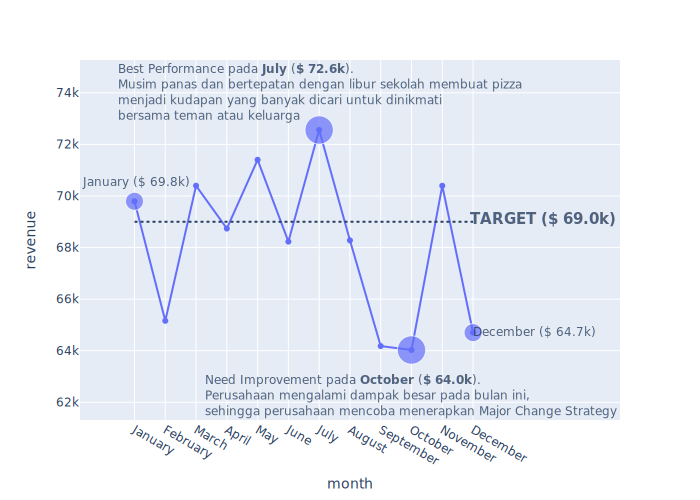

In [20]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention,
        x = 'month',
        y = 'revenue',
        size = [4, 10, 10, 4]
    ).data[0]
)

"""
  Preattentive Attribute 1B
    - Tambahkan label data pada awal & akhir tahun
    - Label berupa nama bulan dan total revenue yang diperoleh
    - Pembulatan revenue ke angka ribuan terdekat
"""

# Label untuk awal tahun (index_awal)
fig.add_annotation(
    x = attention.loc[index_awal, 'month'],
    y = attention.loc[index_awal, 'revenue'],
    text = f"{attention.loc[index_awal, 'month']} ($ {attention.loc[index_awal, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 10,
    opacity = 0.8
)

# Label untuk akhir tahun (index_akhir)
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = attention.loc[index_akhir, 'revenue'],
    text = f"{attention.loc[index_akhir, 'month']} ($ {attention.loc[index_akhir, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    xshift = 60,
    yshift = -8,
    opacity = 0.8
)

"""
  Preattentive Attribute 1C
    - Tambahkan annotation pada revenue tertinggi dan terendah
    - Buat analisa sederhana mengapa hal tersebut dapat terjadi
"""

# Annotation untuk revenue tertinggi (index_max)
fig.add_annotation(
    x = attention.loc[index_max, 'month'],
    y = attention.loc[index_max, 'revenue'],
    text = f"Best Performance pada <b>{attention.loc[index_max, 'month']}</b> (<b>$ { attention.loc[index_max, 'revenue']/1000:.1f}k</b>).<br>"
            "Musim panas dan bertepatan dengan libur sekolah membuat pizza<br>"
            "menjadi kudapan yang banyak dicari untuk dinikmati<br>"
            "bersama teman atau keluarga",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 5,
    opacity = 0.8
)

# Annotation untuk revenue terendah (index_min)
fig.add_annotation(
    x = attention.loc[index_min, 'month'],
    y = attention.loc[index_min, 'revenue'],
    text = f"Need Improvement pada <b>{attention.loc[index_min, 'month']}</b> (<b>$ {attention.loc[index_min, 'revenue']/1000:.1f}k</b>).<br>"
            "Perusahaan mengalami dampak besar pada bulan ini,<br>"
            "sehingga perusahaan mencoba menerapkan <i>Major Change Strategy</i><br>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = -70,
    opacity = 0.8
)

"""
  Preattentive Attribute 2
    - Tambahkan garis putus-putus untuk target agar data dapat diklasifikasikan dengan mudah
"""

# Penambahan garis putus -putus (dash = dot)
fig.add_shape(
    type = 'line',
    x0 = attention.loc[index_awal, 'month'],
    y0 = goal_value,
    x1 = attention.loc[index_akhir, 'month'],
    y1 = goal_value,
    line = dict(
        width = 2,
        dash = 'dot'
    )
)

# Tambahkan teks target
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = goal_value,
    text = f"<b>TARGET ($ {goal_value/1000:.1f}k)</b>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 15,
        family = "sans serif"
    ),
    align = "left",
    xshift = 70,
    yshift = -8,
    opacity = 0.8
)

# Tampilkan grafik
fig.show()

## 👨‍🔧 Reparasi Data Viz 3 : Penambahan *Title Chart* & Mengatur Ukuran Grafik

---

*Title* (judul) dan keterangan membuat visualisasi jauh lebih mudah dipahami. Judul harus menggambarkan dengan jelas apa yang digambarkan pada grafik namun trend pada saat ini judul grafik biasanya bersifat parabola untuk lebih menarik audience membaca grafik. Namun hal tersebut bersifat opsional saja yang terpenting judul harus menggambarkan grafik yang ingin disampaikan dengan jelas. Untuk memberi judul gunakan sintaks berikut



```
fig.update_layout(
    # Mengatur panjang & lebar figure
    width = ...,
    height = ...,

    # Memberi judul pada grafik dan mengatur format fontnya
    title = dict(
        text = ... ,
        font = dict(
           ...
        )
    )
)
```

docs : <i>https://plotly.com/python/reference/layout/</i>

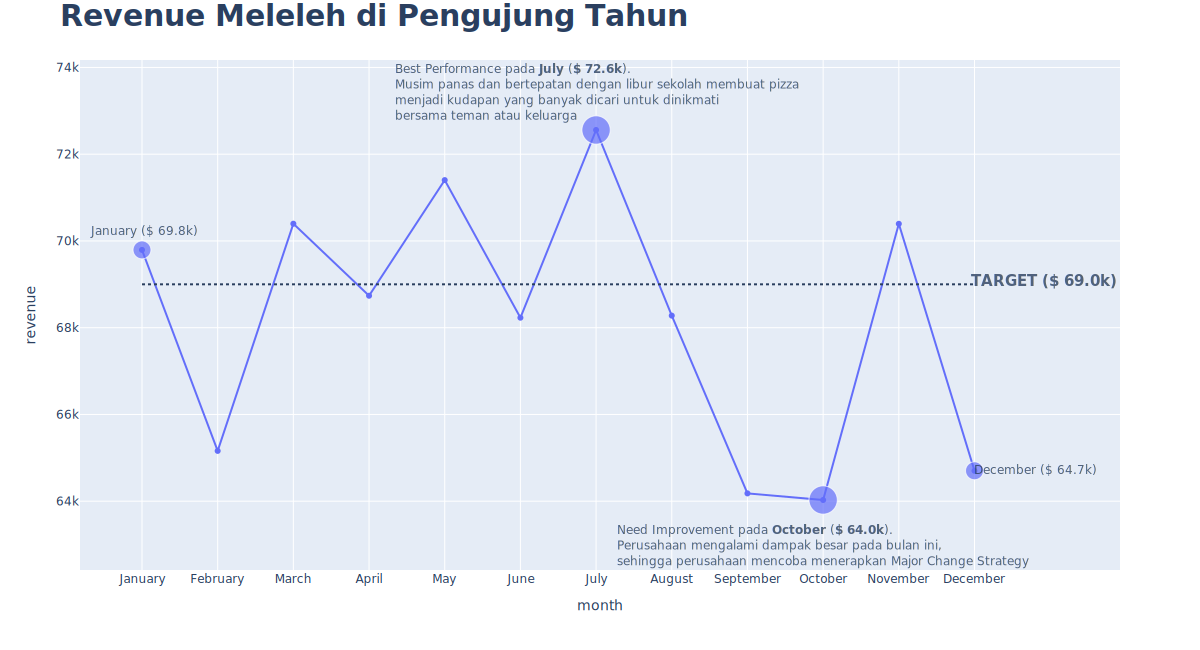

In [21]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention,
        x = 'month',
        y = 'revenue',
        size = [4, 10, 10, 4]
    ).data[0]
)

"""
  Preattentive Attribute 1B
    - Tambahkan label data pada awal & akhir tahun
    - Label berupa nama bulan dan total revenue yang diperoleh
    - Pembulatan revenue ke angka ribuan terdekat
"""

# Label untuk awal tahun (index_awal)
fig.add_annotation(
    x = attention.loc[index_awal, 'month'],
    y = attention.loc[index_awal, 'revenue'],
    text = f"{attention.loc[index_awal, 'month']} ($ {attention.loc[index_awal, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 10,
    opacity = 0.8
)

# Label untuk akhir tahun (index_akhir)
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = attention.loc[index_akhir, 'revenue'],
    text = f"{attention.loc[index_akhir, 'month']} ($ {attention.loc[index_akhir, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    xshift = 60,
    yshift = -8,
    opacity = 0.8
)

"""
  Preattentive Attribute 1C
    - Tambahkan annotation pada revenue tertinggi dan terendah
    - Buat analisa sederhana mengapa hal tersebut dapat terjadi
"""

# Annotation untuk revenue tertinggi (index_max)
fig.add_annotation(
    x = attention.loc[index_max, 'month'],
    y = attention.loc[index_max, 'revenue'],
    text = f"Best Performance pada <b>{attention.loc[index_max, 'month']}</b> (<b>$ { attention.loc[index_max, 'revenue']/1000:.1f}k</b>).<br>"
            "Musim panas dan bertepatan dengan libur sekolah membuat pizza<br>"
            "menjadi kudapan yang banyak dicari untuk dinikmati<br>"
            "bersama teman atau keluarga",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 5,
    opacity = 0.8
)

# Annotation untuk revenue terendah (index_min)
fig.add_annotation(
    x = attention.loc[index_min, 'month'],
    y = attention.loc[index_min, 'revenue'],
    text = f"Need Improvement pada <b>{attention.loc[index_min, 'month']}</b> (<b>$ {attention.loc[index_min, 'revenue']/1000:.1f}k</b>).<br>"
            "Perusahaan mengalami dampak besar pada bulan ini,<br>"
            "sehingga perusahaan mencoba menerapkan <i>Major Change Strategy</i><br>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = -70,
    opacity = 0.8
)

"""
  Preattentive Attribute 2
    - Tambahkan garis putus-putus untuk target agar data dapat diklasifikasikan dengan mudah
"""

# Penambahan garis putus -putus (dash = dot)
fig.add_shape(
    type = 'line',
    x0 = attention.loc[index_awal, 'month'],
    y0 = goal_value,
    x1 = attention.loc[index_akhir, 'month'],
    y1 = goal_value,
    line = dict(
        width = 2,
        dash = 'dot'
    )
)

# Tambahkan teks target
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = goal_value,
    text = f"<b>TARGET ($ {goal_value/1000:.1f}k)</b>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 15,
        family = "sans serif"
    ),
    align = "left",
    xshift = 70,
    yshift = -8,
    opacity = 0.8
)

"""
  Preattentive Attribute 3
    - Mengatur ukuran grafik
    - Penambahan title
"""

fig.update_layout(
    # Mengatur panjang & lebar figure
    width = 1200,
    height = 650,

    # Memberi judul pada grafik dan mengatur format fontnya
    title = dict(
        text = '<b><i>Revenue</i> Meleleh di Pengujung Tahun</b><br><sup><sup>Penjualan Pizza di Tahun 2015 Kurang \'Nendang\'<sup><sup>',
        font = dict(
            family = 'sans serif',
            size = 30,
        ),
        y = 0.96
    )
)

# Tampilkan grafik
fig.show()

## 👨‍🔧 Reparasi Data Viz 4 : *Decluttering*

---

Proses *decluttering* dalam visualisasi data mengacu pada upaya untuk membersihkan dan menyederhanakan visualisasi data agar lebih efektif dan mudah dipahami. Pada grafik yang telah dibuat akan dilakukan proses decluttering sebagai berikut :     

1.   Menghapus *grid* pada grafik
2.   Menghapus label pada sumbu-x karena sudah jelas bahwa axis ticks yang ditampilkan menunjukan kategori nama bulan
3.   Pada sumbu-y perlu dipastikan tidak dimulai dari 0 karena tidak terlalu perlu dan dikhawatirkan trend malah tidak terlihat


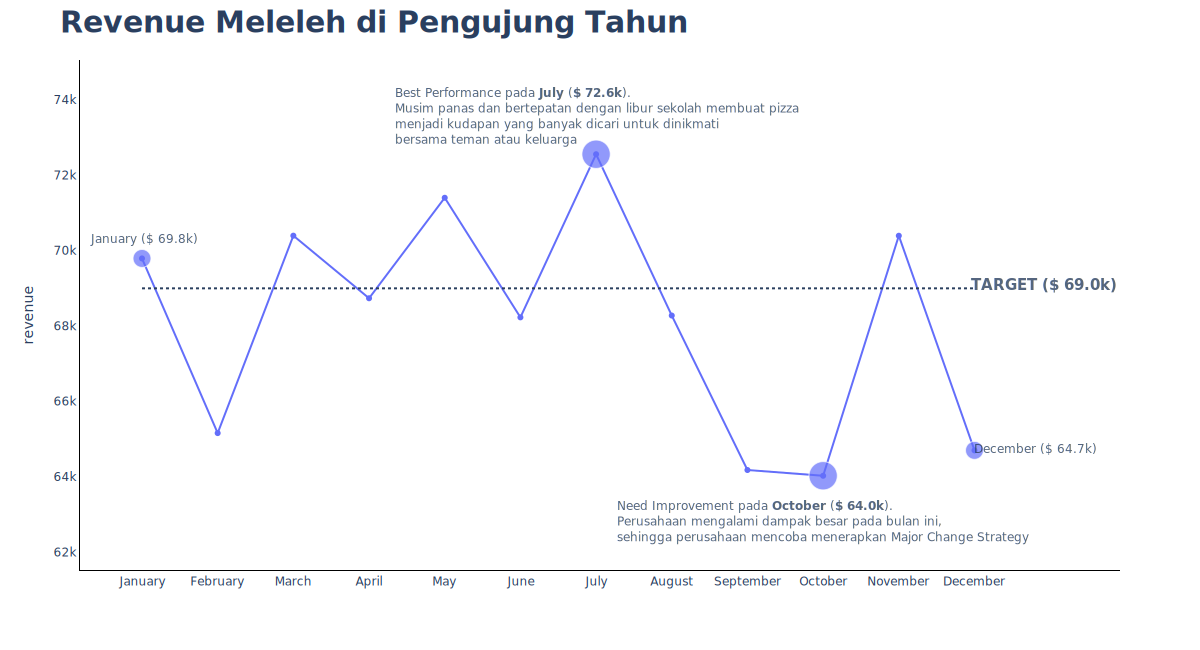

In [22]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention,
        x = 'month',
        y = 'revenue',
        size = [4, 10, 10, 4]
    ).data[0]
)

"""
  Preattentive Attribute 1B
    - Tambahkan label data pada awal & akhir tahun
    - Label berupa nama bulan dan total revenue yang diperoleh
    - Pembulatan revenue ke angka ribuan terdekat
"""

# Label untuk awal tahun (index_awal)
fig.add_annotation(
    x = attention.loc[index_awal, 'month'],
    y = attention.loc[index_awal, 'revenue'],
    text = f"{attention.loc[index_awal, 'month']} ($ {attention.loc[index_awal, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 10,
    opacity = 0.8
)

# Label untuk akhir tahun (index_akhir)
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = attention.loc[index_akhir, 'revenue'],
    text = f"{attention.loc[index_akhir, 'month']} ($ {attention.loc[index_akhir, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    xshift = 60,
    yshift = -8,
    opacity = 0.8
)

"""
  Preattentive Attribute 1C
    - Tambahkan annotation pada revenue tertinggi dan terendah
    - Buat analisa sederhana mengapa hal tersebut dapat terjadi
"""

# Annotation untuk revenue tertinggi (index_max)
fig.add_annotation(
    x = attention.loc[index_max, 'month'],
    y = attention.loc[index_max, 'revenue'],
    text = f"Best Performance pada <b>{attention.loc[index_max, 'month']}</b> (<b>$ { attention.loc[index_max, 'revenue']/1000:.1f}k</b>).<br>"
            "Musim panas dan bertepatan dengan libur sekolah membuat pizza<br>"
            "menjadi kudapan yang banyak dicari untuk dinikmati<br>"
            "bersama teman atau keluarga",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 5,
    opacity = 0.8
)

# Annotation untuk revenue terendah (index_min)
fig.add_annotation(
    x = attention.loc[index_min, 'month'],
    y = attention.loc[index_min, 'revenue'],
    text = f"Need Improvement pada <b>{attention.loc[index_min, 'month']}</b> (<b>$ {attention.loc[index_min, 'revenue']/1000:.1f}k</b>).<br>"
            "Perusahaan mengalami dampak besar pada bulan ini,<br>"
            "sehingga perusahaan mencoba menerapkan <i>Major Change Strategy</i><br>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = -70,
    opacity = 0.8
)

"""
  Preattentive Attribute 2
    - Tambahkan garis putus-putus untuk target agar data dapat diklasifikasikan dengan mudah
"""

# Penambahan garis putus -putus (dash = dot)
fig.add_shape(
    type = 'line',
    x0 = attention.loc[index_awal, 'month'],
    y0 = goal_value,
    x1 = attention.loc[index_akhir, 'month'],
    y1 = goal_value,
    line = dict(
        width = 2,
        dash = 'dot'
    )
)

# Tambahkan teks target
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = goal_value,
    text = f"<b>TARGET ($ {goal_value/1000:.1f}k)</b>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 15,
        family = "sans serif"
    ),
    align = "left",
    xshift = 70,
    yshift = -8,
    opacity = 0.8
)

"""
  Decluttering
    - Menghapus Grid
    - Menghapus x-axis Label
"""

# Update layout
fig.update_layout(
    height = 650,
    width = 1200,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        range = [attention.loc[index_min, 'revenue'] - 2500, attention.loc[index_max, 'revenue'] + 2500],
        showline = True,
        linecolor = 'black',
        linewidth = 1,
    ),
    xaxis = dict(
        title = '',
        showline = True,
        linecolor = 'black',
        linewidth = 1,
    ),
    title = dict(
        text = '<b><i>Revenue</i> Meleleh di Pengujung Tahun</b><br><sup><sup>Penjualan Pizza di Tahun 2015 Kurang \'Nendang\'<sup><sup>',
        font = dict(
            family = 'sans serif',
            size = 30,
        ),
        y = 0.95
    )
)

# Tampilkan grafik
fig.show()

Grafik yang ditampilkan saat ini lebih 'bersih' dan lebih sedap dipandang. Dengan pengaturan ukuran grafik yang tepat trend pada grafik dapat terlihat dengan lebih jelas

## 👨‍🔧 Reparasi Data Viz 5 : *Hover to Highlight*

---

Salah satu fitur visualisasi interaktif yang paling mantab saat menggunakan library Plotly adalah kemampuan pengguna untuk menganalisa lebih banyak informasi tentang titik data dengan menggerakkan kursor mouse ke atas titik dan memunculkan label *hover*.

Detail informasi yang ingin ditampilkan adalah sebagai berikut :     

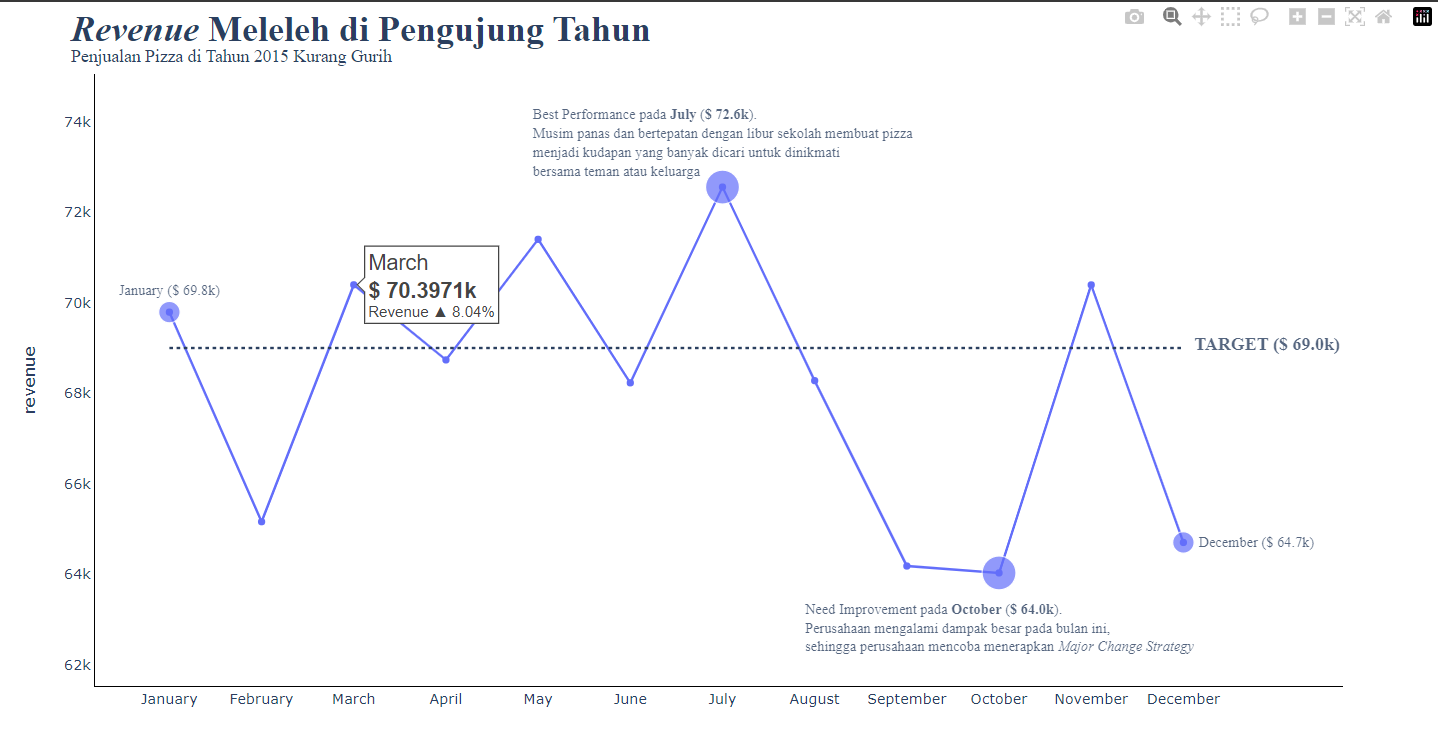

Saat kursor diarahkan ke titik data maka secara otomatis akan ditampilkan informasi mengenai Bulan, Pendapatan dan Trend Naik Turunnya data. Tentu dapat ditambahkan informasi lainnya jika diperlukan.

docs : <i>https://plotly.com/python/hover-text-and-formatting/</i>



In [23]:
# Hitung percentage difference
sales_overtime['percentage_diff'] = sales_overtime['revenue'].pct_change() * 100
sales_overtime['percentage_diff'] = ['▲ ' + str(i) + '%' if i > 0 else '▼ ' + str(i) + '%' for i in sales_overtime['percentage_diff'].round(2)]

# Copy pada dataframe attention
attention['percentage_diff'] = sales_overtime[sales_overtime['month'].isin(attention['month'])]['percentage_diff']

# Tampilkan data
display(sales_overtime)

,month,year,revenue,percentage_diff
0,January,2015,69793.30,▼ nan%
1,February,2015,65159.60,▼ -6.64%
2,March,2015,70397.10,▲ 8.04%
3,April,2015,68736.80,▼ -2.36%
4,May,2015,71402.75,▲ 3.88%
5,June,2015,68230.20,▼ -4.44%
6,July,2015,72557.90,▲ 6.34%
7,August,2015,68278.25,▼ -5.9%
8,September,2015,64180.05,▼ -6.0%
9,October,2015,64027.60,▼ -0.24%


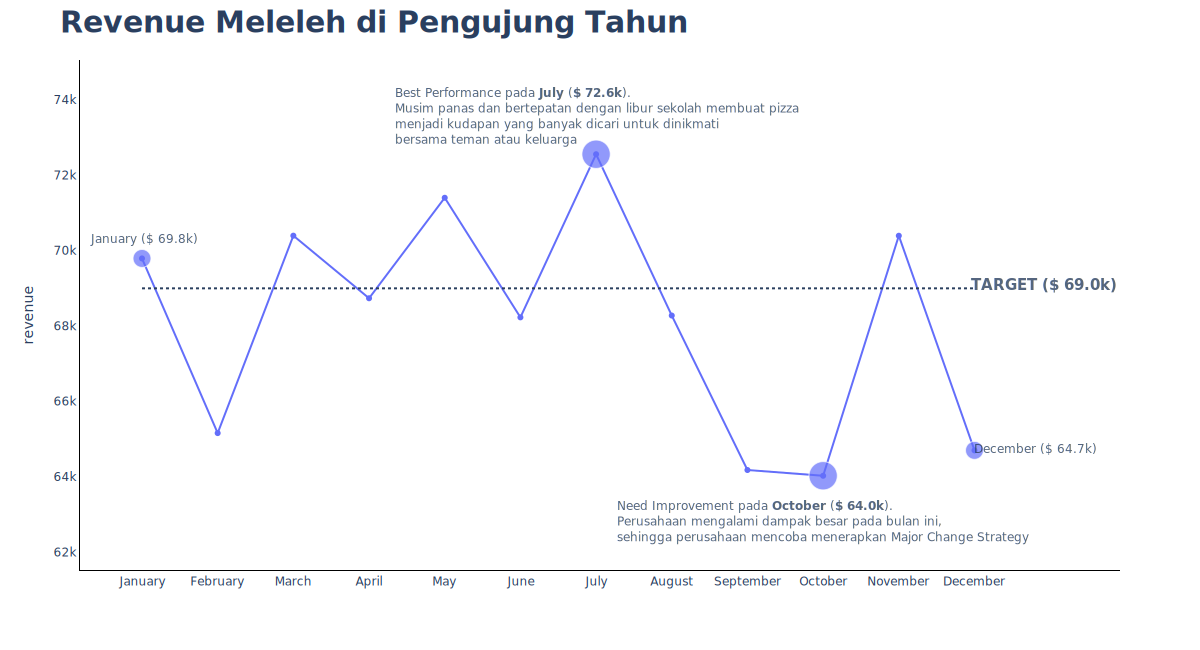

In [24]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True,
    # Penambahan detail saat data di hover
    hover_data = ['percentage_diff'],
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention,
        x = 'month',
        y = 'revenue',
        size = [4, 10, 10, 4],
        # Penambahan detail saat data di hover
        hover_data = ['percentage_diff'],
    ).data[0]
)

"""
  Preattentive Attribute 1B
    - Tambahkan label data pada awal & akhir tahun
    - Label berupa nama bulan dan total revenue yang diperoleh
    - Pembulatan revenue ke angka ribuan terdekat
"""

# Label untuk awal tahun (index_awal)
fig.add_annotation(
    x = attention.loc[index_awal, 'month'],
    y = attention.loc[index_awal, 'revenue'],
    text = f"{attention.loc[index_awal, 'month']} ($ {attention.loc[index_awal, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 10,
    opacity = 0.8
)

# Label untuk akhir tahun (index_akhir)
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = attention.loc[index_akhir, 'revenue'],
    text = f"{attention.loc[index_akhir, 'month']} ($ {attention.loc[index_akhir, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    xshift = 60,
    yshift = -8,
    opacity = 0.8
)

"""
  Preattentive Attribute 1C
    - Tambahkan annotation pada revenue tertinggi dan terendah
    - Buat analisa sederhana mengapa hal tersebut dapat terjadi
"""

# Annotation untuk revenue tertinggi (index_max)
fig.add_annotation(
    x = attention.loc[index_max, 'month'],
    y = attention.loc[index_max, 'revenue'],
    text = f"Best Performance pada <b>{attention.loc[index_max, 'month']}</b> (<b>$ { attention.loc[index_max, 'revenue']/1000:.1f}k</b>).<br>"
            "Musim panas dan bertepatan dengan libur sekolah membuat pizza<br>"
            "menjadi kudapan yang banyak dicari untuk dinikmati<br>"
            "bersama teman atau keluarga",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = 5,
    opacity = 0.8
)

# Annotation untuk revenue terendah (index_min)
fig.add_annotation(
    x = attention.loc[index_min, 'month'],
    y = attention.loc[index_min, 'revenue'],
    text = f"Need Improvement pada <b>{attention.loc[index_min, 'month']}</b> (<b>$ {attention.loc[index_min, 'revenue']/1000:.1f}k</b>).<br>"
            "Perusahaan mengalami dampak besar pada bulan ini,<br>"
            "sehingga perusahaan mencoba menerapkan <i>Major Change Strategy</i><br>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif"
    ),
    align = "left",
    yshift = -70,
    opacity = 0.8
)

"""
  Preattentive Attribute 2
    - Tambahkan garis putus-putus untuk target agar data dapat diklasifikasikan dengan mudah
"""

# Penambahan garis putus -putus (dash = dot)
fig.add_shape(
    type = 'line',
    x0 = attention.loc[index_awal, 'month'],
    y0 = goal_value,
    x1 = attention.loc[index_akhir, 'month'],
    y1 = goal_value,
    line = dict(
        width = 2,
        dash = 'dot'
    )
)

# Tambahkan teks target
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = goal_value,
    text = f"<b>TARGET ($ {goal_value/1000:.1f}k)</b>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 15,
        family = "sans serif"
    ),
    align = "left",
    xshift = 70,
    yshift = -8,
    opacity = 0.8
)

"""
  Decluttering
    - Menghapus Grid
    - Menghapus x-axis Label
"""

# Update layout
fig.update_layout(
    height = 650,
    width = 1200,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        range = [attention.loc[index_min, 'revenue'] - 2500, attention.loc[index_max, 'revenue'] + 2500],
        showline = True,
        linecolor = 'black',
        linewidth = 1,
    ),
    xaxis = dict(
        title = '',
        showline = True,
        linecolor = 'black',
        linewidth = 1,
    ),
    title = dict(
        text = '<b><i>Revenue</i> Meleleh di Pengujung Tahun</b><br><sup><sup>Penjualan Pizza di Tahun 2015 Kurang \'Nendang\'<sup><sup>',
        font = dict(
            family = 'sans serif',
            size = 30,
        ),
        y = 0.95
    )
)

"""
  Hover to Highlight
    - Pengaturan teks saat data di hover
"""
fig.update_traces(
    hovertemplate = '%{x}<br><b>$ %{y}</b><br><sup>Revenue %{customdata[0]}</sup>',
    hoverlabel = dict(
        bgcolor = 'white',
        font = dict(
            size = 18
        )
    )
)

# Tampilkan grafik
fig.show()

## 👨‍🔧 Reparasi Data Viz 6 : *Coloring*

---

Warna merupakan salah satu elemen visualisasi data yang cukup penting untuk diperhatikan. Warna dapat menggambarkan 'kesan' dan dapat pula menyampaikan 'pesan' pada data.

Pada proyek kali ini, warna yang akan digunakan akan bersumber dari warna-warna pada pizza (seperti merah yang menggambarkan saus, coklat yang menggambarkan adonan, dll). Warna tersebut dipilih untuk menambahkan kesan estetika saja dan sangat bergantung pada preferensi pembuat grafik.

docs : <i>https://blog.datawrapper.de/colors-for-data-vis-style-guides/</i>

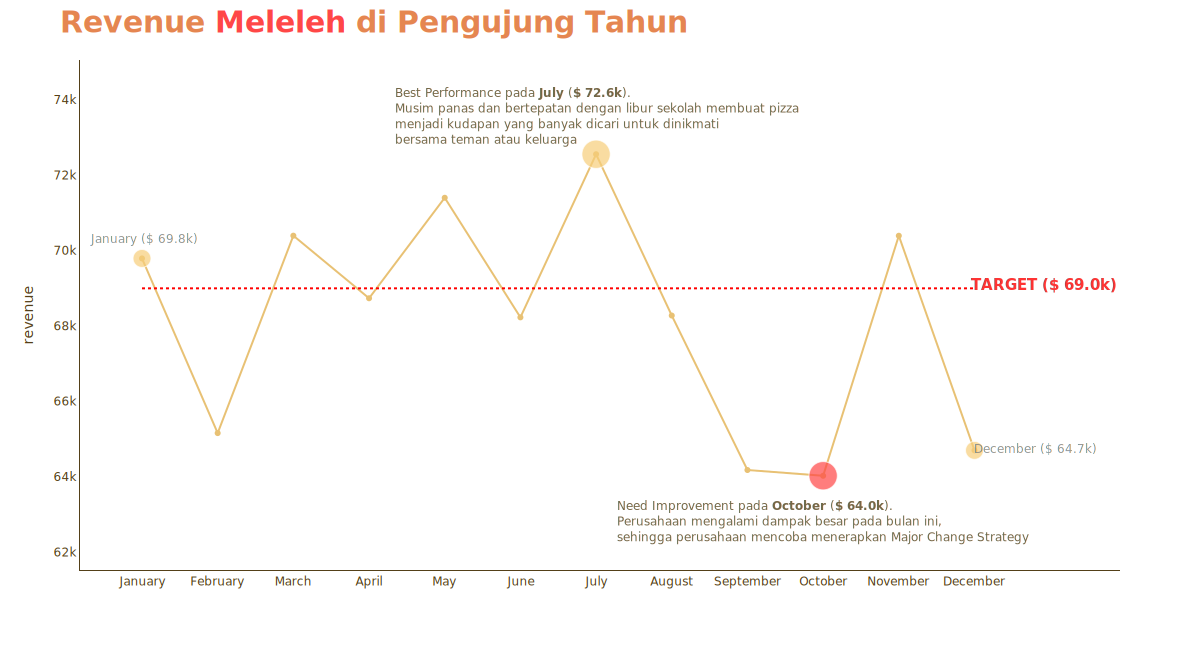

In [25]:
# Import library plotly untuk visualisasi data
import plotly.express as px

# Buat grafik line dasar
fig = px.line(
    data_frame = sales_overtime,
    x = 'month',
    y = 'revenue',
    markers = True,
    # Penambahan detail saat data di hover
    hover_data = ['percentage_diff'],
    # Pewarnaan pada line chart
    color_discrete_sequence = ['#E8C174']
)

"""
  Preattentive Attribute 1A
    - Tambahkan penanda titik yang lebih besar pada atensi
    - Ukuran (size) = 4 untuk awal dan akhir tahun
    - Ukuran (size) = 10 untuk max & min revenue
"""
fig.add_trace(
    px.scatter(
        data_frame = attention[attention['month'].isin(['January', 'July', 'December'])],
        x = 'month',
        y = 'revenue',
        size = [4, 10, 4],
        # Penambahan detail saat data di hover
        hover_data = ['percentage_diff'],
        # Pewarnaan pada scatter chart
        color_discrete_sequence = ['#F7CD7A'],
    ).data[0]
)

fig.add_trace(
    px.scatter(
        data_frame = attention[attention['month'].isin(['October'])],
        x = 'month',
        y = 'revenue',
        size = [10],
        # Penambahan detail saat data di hover
        hover_data = ['percentage_diff'],
        # Pewarnaan pada scatter chart
        color_discrete_sequence = ['#FF4747'],
    ).data[0]
)

"""
  Preattentive Attribute 1B
    - Tambahkan label data pada awal & akhir tahun
    - Label berupa nama bulan dan total revenue yang diperoleh
    - Pembulatan revenue ke angka ribuan terdekat
"""

# Label untuk awal tahun (index_awal)
fig.add_annotation(
    x = attention.loc[index_awal, 'month'],
    y = attention.loc[index_awal, 'revenue'],
    text = f"{attention.loc[index_awal, 'month']} ($ {attention.loc[index_awal, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif",
        color = "grey"
    ),
    align = "left",
    yshift = 10,
    opacity = 0.8
)

# Label untuk akhir tahun (index_akhir)
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = attention.loc[index_akhir, 'revenue'],
    text = f"{attention.loc[index_akhir, 'month']} ($ {attention.loc[index_akhir, 'revenue']/1000:.1f}k)",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        family = "sans serif",
        color = "grey",
    ),
    align = "left",
    xshift = 60,
    yshift = -8,
    opacity = 0.8
)

"""
  Preattentive Attribute 1C
    - Tambahkan annotation pada revenue tertinggi dan terendah
    - Buat analisa sederhana mengapa hal tersebut dapat terjadi
"""

# Annotation untuk revenue tertinggi (index_max)
fig.add_annotation(
    x = attention.loc[index_max, 'month'],
    y = attention.loc[index_max, 'revenue'],
    text = f"Best Performance pada <b>{attention.loc[index_max, 'month']}</b> (<b>$ { attention.loc[index_max, 'revenue']/1000:.1f}k</b>).<br>"
            "Musim panas dan bertepatan dengan libur sekolah membuat pizza<br>"
            "menjadi kudapan yang banyak dicari untuk dinikmati<br>"
            "bersama teman atau keluarga",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        color = "#544018",
        family = "sans serif"
    ),
    align = "left",
    yshift = 5,
    opacity = 0.8
)

# Annotation untuk revenue terendah (index_min)
fig.add_annotation(
    x = attention.loc[index_min, 'month'],
    y = attention.loc[index_min, 'revenue'],
    text = f"Need Improvement pada <b>{attention.loc[index_min, 'month']}</b> (<b>$ {attention.loc[index_min, 'revenue']/1000:.1f}k</b>).<br>"
            "Perusahaan mengalami dampak besar pada bulan ini,<br>"
            "sehingga perusahaan mencoba menerapkan <i>Major Change Strategy</i><br>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 12,
        color = "#544018",
        family = "sans serif"
    ),
    align = "left",
    yshift = -70,
    opacity = 0.8
)

"""
  Preattentive Attribute 2
    - Tambahkan garis putus-putus untuk target agar data dapat diklasifikasikan dengan mudah
"""

# Penambahan garis putus -putus (dash = dot)
fig.add_shape(
    type = 'line',
    x0 = attention.loc[index_awal, 'month'],
    y0 = goal_value,
    x1 = attention.loc[index_akhir, 'month'],
    y1 = goal_value,
    line = dict(
        width = 2,
        dash = 'dot',
        # Pewarnaan garis target
        color = '#FF0000'
    )
)

# Tambahkan teks target
fig.add_annotation(
    x = attention.loc[index_akhir, 'month'],
    y = goal_value,
    text = f"<b>TARGET ($ {goal_value/1000:.1f}k)</b>",
    yanchor = 'bottom',
    showarrow = False,
    font = dict(
        size = 15,
        family = "sans serif",
        # Pewarnaan teks target
        color = "#FF0000"
    ),
    align = "left",
    xshift = 70,
    yshift = -8,
    opacity = 0.8
)

"""
  Decluttering
    - Menghapus Grid
    - Menghapus x-axis Label
"""

# Update layout
fig.update_layout(
    height = 650,
    width = 1200,
    plot_bgcolor = 'rgba(0, 0, 0, 0)',
    yaxis = dict(
        range = [attention.loc[index_min, 'revenue'] - 2500, attention.loc[index_max, 'revenue'] + 2500],
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    xaxis = dict(
        title = '',
        showline = True,
        linewidth = 1,
        color = '#544018',
        linecolor = '#544018'
    ),
    title = dict(
        text = '<b><i>Revenue</i> <span style="color:#FF4747">Meleleh</span> di Pengujung Tahun</b><br><sup><sup>Penjualan Pizza di Tahun 2015 Kurang \'Nendang\'<sup><sup>',
        font = dict(
            family = 'sans serif',
            size = 30,
            color = '#E58651'
        ),
        y = 0.95
    )
)

"""
  Hover to Highlight
    - Pengaturan teks saat data di hover
"""
fig.update_traces(
    hovertemplate = '%{x}<br><b>$ %{y}</b><br><sup>Revenue %{customdata[0]}</sup>',
    hoverlabel = dict(
        bgcolor = 'white',
        font = dict(
            size = 18,
            color = '#DBB66B'
        )
    )
)

# Tampilkan grafik
fig.show()

*and voilaa ...* grafik yang ditampilkan lebih informatif dan *eye-catching*. Dengan melihat grafik diatas apa *insight* atau informasi yang anda dapatkan?
<br><br>
Ada pendapat atau masukan terkait proyek ini? Feel free to contact this great person below ^^ : <br><br>

<img alt="Linked In" src="https://img.shields.io/badge/-Linked%20In-0072b1?style=for-the-badge&logo=linkedin&logoColor=white"/> <a href="https://linkedin.com/in/bachtiyarma"><img alt="Linked In Link" src="https://img.shields.io/badge/-Bachtiyar%20M.%20Arief-0072b1?style=for-the-badge&logo=None&logoColor=white"/></a><br>

<img alt="Gmail" src="https://img.shields.io/badge/-g%09m%09a%09i%09l-f7435d?style=for-the-badge&logo=gmail&logoColor=white"/> <a href="https://gmail.com"><img alt="Gmail" src="https://img.shields.io/badge/-bachtiyar.arief11@gmail.com-f7435d?style=for-the-badge&logo=None&logoColor=white"/></a>